In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("QVI_data.csv")

In [3]:
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [4]:
df.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,2.648340e+05,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,135.079423,1.351576e+05,56.583554,1.905813,7.299346,182.425512
std,8.057990e+04,76.784063,7.813292e+04,32.826444,0.343436,2.527241,64.325148
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,7.002100e+04,70.000000,6.760050e+04,28.000000,2.000000,5.400000,150.000000
50%,1.303570e+05,130.000000,1.351365e+05,56.000000,2.000000,7.400000,170.000000
75%,2.030940e+05,203.000000,2.026998e+05,85.000000,2.000000,9.200000,175.000000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [6]:
df.isnull().sum()/len(df)*100

LYLTY_CARD_NBR      0.0
DATE                0.0
STORE_NBR           0.0
TXN_ID              0.0
PROD_NBR            0.0
PROD_NAME           0.0
PROD_QTY            0.0
TOT_SALES           0.0
PACK_SIZE           0.0
BRAND               0.0
LIFESTAGE           0.0
PREMIUM_CUSTOMER    0.0
dtype: float64

In [7]:
df.shape

(264834, 12)

In [8]:
df.nunique()

LYLTY_CARD_NBR       72636
DATE                   364
STORE_NBR              272
TXN_ID              263125
PROD_NBR               114
PROD_NAME              114
PROD_QTY                 5
TOT_SALES              111
PACK_SIZE               21
BRAND                   21
LIFESTAGE                7
PREMIUM_CUSTOMER         3
dtype: int64

In [9]:
# Converting into months

df['month_year'] = pd.to_datetime(df['DATE']).dt.to_period('M')

In [10]:
df['UPRICE'] = df['TOT_SALES'] / df['PROD_QTY']

In [11]:
#pre trial observation
#filter only stores with full 12 months observation
sales_pc = df.groupby(['STORE_NBR','month_year']).agg({'PROD_QTY':'sum','TOT_SALES':'sum','TXN_ID':'count', 'LYLTY_CARD_NBR':'nunique', 'UPRICE':'mean'}).reset_index().sort_values('STORE_NBR')
sales_pc['SALES_PC'] = sales_pc.TOT_SALES / sales_pc.TXN_ID
sales_pc['QTY_PC'] = sales_pc.PROD_QTY / sales_pc.TXN_ID
sales_pc['AVG_PP'] = sales_pc.TOT_SALES / sales_pc.PROD_QTY
sales_pc['TxnPCust'] = sales_pc.TXN_ID / sales_pc.LYLTY_CARD_NBR
sales_pc['ChsPTxn'] = sales_pc.PROD_QTY / sales_pc.LYLTY_CARD_NBR

In [12]:
sales_pc

,STORE_NBR,month_year,PROD_QTY,TOT_SALES,TXN_ID,LYLTY_CARD_NBR,UPRICE,SALES_PC,QTY_PC,AVG_PP,TxnPCust,ChsPTxn
0,1,2018-07,62,206.90,52,49,3.384615,3.978846,1.192308,3.337097,1.061224,1.265306
11,1,2019-06,53,174.10,43,42,3.262791,4.048837,1.232558,3.284906,1.023810,1.261905
10,1,2019-05,66,221.40,51,46,3.434314,4.341176,1.294118,3.354545,1.108696,1.434783
9,1,2019-04,57,192.90,43,42,3.462791,4.486047,1.325581,3.384211,1.023810,1.357143
7,1,2019-02,65,225.40,55,52,3.507273,4.098182,1.181818,3.467692,1.057692,1.250000
...,...,...,...,...,...,...,...,...,...,...,...,...
3158,272,2018-08,85,372.85,48,44,4.346875,7.767708,1.770833,4.386471,1.090909,1.931818
3157,272,2018-07,98,433.10,52,48,4.419231,8.328846,1.884615,4.419388,1.083333,2.041667
3167,272,2019-05,71,314.60,40,34,4.437500,7.865000,1.775000,4.430986,1.176471,2.088235
3161,272,2018-11,87,376.20,45,41,4.308889,8.360000,1.933333,4.324138,1.097561,2.121951


In [13]:
sales_pc.isnull().sum()

STORE_NBR         0
month_year        0
PROD_QTY          0
TOT_SALES         0
TXN_ID            0
LYLTY_CARD_NBR    0
UPRICE            0
SALES_PC          0
QTY_PC            0
AVG_PP            0
TxnPCust          0
ChsPTxn           0
dtype: int64

In [14]:
# There are only 260 to 272 stores register values for all the 12 months

observations_per_store = sales_pc.groupby('STORE_NBR', as_index = False).month_year.count()
store_nbr = observations_per_store[ observations_per_store.month_year == 12].STORE_NBR.array
store_nbr

<PandasArray>
[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
 ...
 263, 264, 265, 266, 267, 268, 269, 270, 271, 272]
Length: 260, dtype: int64

In [15]:
#sales_pc = sales_pc[sales_pc.STORE_NBR.isin(store_nbr)]

In [16]:
preTrialMeasures =  sales_pc[sales_pc.month_year < '2019-02']

In [17]:
#trial_stores_number = [77, 86, 88]
#comparison_stores_number = sales_pc.STORE_NBR.unique().tolist()

In [18]:
def calcCorrTable(metricCol, storeComparison, inputTable = preTrialMeasures):
    """Calculate correlation for a measure, looping through each control store.
    Args:
        metricCol (str): Name of column containing store's metric to perform correlation test on.
        storeComparison (int): Trial store's number.
        inputTable (dataframe):  Metric table with potential comparison stores.
        
    Returns:
        DataFrame: Monthly correlation table between Trial and each Control stores.
    """
    control_store_nbrs = inputTable[~inputTable["STORE_NBR"].isin([77, 86, 88])]["STORE_NBR"].unique()
    corrs = pd.DataFrame(columns = ["month_year", "Trial_Str", "Ctrl_Str", "Corr_Score"])
    trial_store = inputTable[inputTable["STORE_NBR"] == storeComparison][metricCol].reset_index()
    for control in control_store_nbrs:
        concat_df = pd.DataFrame(columns = ["month_year", "Trial_Str", "Ctrl_Str", "Corr_Score"])
        control_store = inputTable[inputTable["STORE_NBR"] == control][metricCol].reset_index()
        concat_df["Corr_Score"] = trial_store.corrwith(control_store, axis=1)
        concat_df["Trial_Str"] = storeComparison
        concat_df["Ctrl_Str"] = control
        concat_df["month_year"] = list(inputTable[inputTable["STORE_NBR"] == storeComparison]["month_year"])
        corrs = pd.concat([corrs, concat_df])
    return corrs

In [19]:
corr_table = pd.DataFrame()
for trial_num in [77, 86, 88]:
    corr_table = pd.concat([corr_table, calcCorrTable(["TOT_SALES", "LYLTY_CARD_NBR", "TxnPCust", "ChsPTxn", "AVG_PP"], trial_num)])
    
corr_table.head(8)

,month_year,Trial_Str,Ctrl_Str,Corr_Score
0,2019-01,77,1,-0.036815
1,2018-12,77,1,0.073359
2,2018-11,77,1,0.030024
3,2018-10,77,1,-0.020045
4,2018-09,77,1,0.002389
5,2018-08,77,1,0.027276
6,2018-07,77,1,0.099242
0,2019-01,77,2,0.067758


In [20]:
def calculateMagnitudeDistance(metricCol, storeComparison, inputTable = preTrialMeasures):
    """Calculate standardised magnitude distance for a measure, looping through each control store.
    Args:
        metricCol (str): Name of column containing store's metric to perform distance calculation on.
        storeComparison (int): Trial store's number.
        inputTable (dataframe):  Metric table with potential comparison stores.
        
    Returns:
        DataFrame: Monthly magnitude-distance table between Trial and each Control stores.
    """
    control_store_nbrs = inputTable[~inputTable["STORE_NBR"].isin([77, 86, 88])]["STORE_NBR"].unique()
    dists = pd.DataFrame()
    trial_store = inputTable[inputTable["STORE_NBR"] == storeComparison][metricCol]
    for control in control_store_nbrs:
        concat_df  = abs(inputTable[inputTable["STORE_NBR"] == storeComparison].reset_index()[metricCol] - inputTable[inputTable["STORE_NBR"] == control].reset_index()[metricCol])
        concat_df["month_year"] = list(inputTable[inputTable["STORE_NBR"] == storeComparison]["month_year"])
        concat_df["Trial_Str"] = storeComparison
        concat_df["Ctrl_Str"] = control
        dists = pd.concat([dists, concat_df])
    for col in metricCol:
        dists[col] = 1 - ((dists[col] - dists[col].min()) / (dists[col].max() - dists[col].min()))
    dists["magnitude"] = dists[metricCol].mean(axis=1)
    return dists

In [21]:
dist_table = pd.DataFrame()
for trial_num in [77, 86, 88]:
    dist_table = pd.concat([dist_table, calculateMagnitudeDistance(["TOT_SALES", "LYLTY_CARD_NBR", "TxnPCust", "ChsPTxn", "AVG_PP"], trial_num)])
    
dist_table.head()
dist_table

,TOT_SALES,LYLTY_CARD_NBR,TxnPCust,ChsPTxn,AVG_PP,month_year,Trial_Str,Ctrl_Str,magnitude
0,0.998707,0.865385,0.875630,0.596946,0.886094,2019-01,77,1,0.844552
1,0.919661,0.894231,0.914106,0.751279,0.984546,2018-12,77,1,0.892765
2,0.962633,0.951923,0.879450,0.730985,0.832758,2018-11,77,1,0.871550
3,0.988718,0.932692,0.989922,0.940599,0.590725,2018-10,77,1,0.888531
4,0.961986,0.836538,0.992433,0.730669,0.703261,2018-09,77,1,0.844977
...,...,...,...,...,...,...,...,...,...
2,0.236040,0.246154,0.714066,0.874684,0.955863,2018-11,88,272,0.605361
3,0.346797,0.392308,0.566177,0.796632,0.972626,2018-10,88,272,0.614908
4,0.255846,0.384615,0.338353,0.596778,0.965284,2018-09,88,272,0.508175
5,0.368835,0.361538,0.522682,0.827092,0.980249,2018-08,88,272,0.612080


In [22]:
def combine_corr_dist(metricCol, storeComparison, inputTable = preTrialMeasures):
    corrs = calcCorrTable(metricCol, storeComparison, inputTable)
    dists = calculateMagnitudeDistance(metricCol, storeComparison, inputTable)
    dists = dists.drop(metricCol, axis=1)
    combine = pd.merge(corrs, dists, on=["month_year", "Trial_Str", "Ctrl_Str"])
    return combine

In [23]:
compare_metrics_table1 = pd.DataFrame()
for trial_num in [77, 86, 88]:
    compare_metrics_table1 = pd.concat([compare_metrics_table1, combine_corr_dist(["TOT_SALES"], trial_num)])

In [24]:
corr_weight = 0.5
dist_weight = 1 - corr_weight

In [25]:
#Top 5 highest Composite Score for each Trial Store based on TOT_SALES

grouped_comparison_table1 = compare_metrics_table1.groupby(["Trial_Str", "Ctrl_Str"]).mean().reset_index()
grouped_comparison_table1["CompScore"] = (corr_weight * grouped_comparison_table1["Corr_Score"]) + (dist_weight * grouped_comparison_table1["magnitude"])
for trial_num in compare_metrics_table1["Trial_Str"].unique():
    print(grouped_comparison_table1[grouped_comparison_table1["Trial_Str"] == trial_num].sort_values(ascending=False, by="CompScore").head(), '\n')

     Trial_Str  Ctrl_Str  Corr_Score  magnitude  CompScore
228         77       233         1.0   0.986973   0.993486
52          77        53         1.0   0.984150   0.992075
250         77       255         1.0   0.983729   0.991864
45          77        46         1.0   0.982682   0.991341
215         77       220         1.0   0.979520   0.989760 

     Trial_Str  Ctrl_Str  Corr_Score  magnitude  CompScore
372         86       109         1.0   0.966375   0.983188
488         86       225         1.0   0.960068   0.980034
485         86       222         1.0   0.946345   0.973172
470         86       207         1.0   0.945342   0.972671
360         86        97         1.0   0.943419   0.971710 

     Trial_Str  Ctrl_Str  Corr_Score  magnitude  CompScore
575         88        40         1.0   0.940881   0.970441
561         88        26         1.0   0.906847   0.953424
539         88         4         1.0   0.906260   0.953130
607         88        72         1.0   0.903800   0.

In [26]:
compare_metrics_table2 = pd.DataFrame()
for trial_num in [77, 86, 88]:
    compare_metrics_table2 = pd.concat([compare_metrics_table2, combine_corr_dist(["LYLTY_CARD_NBR"], trial_num)])

In [27]:
#Top 5 highest Composite Score for each Trial Store based on No of Customers

grouped_comparison_table2 = compare_metrics_table1.groupby(["Trial_Str", "Ctrl_Str"]).mean().reset_index()
grouped_comparison_table2["CompScore"] = (corr_weight * grouped_comparison_table2["Corr_Score"]) + (dist_weight * grouped_comparison_table2["magnitude"])
for trial_num in compare_metrics_table2["Trial_Str"].unique():
    print(grouped_comparison_table2[grouped_comparison_table2["Trial_Str"] == trial_num].sort_values(ascending=False, by="CompScore").head(), '\n')

     Trial_Str  Ctrl_Str  Corr_Score  magnitude  CompScore
228         77       233         1.0   0.986973   0.993486
52          77        53         1.0   0.984150   0.992075
250         77       255         1.0   0.983729   0.991864
45          77        46         1.0   0.982682   0.991341
215         77       220         1.0   0.979520   0.989760 

     Trial_Str  Ctrl_Str  Corr_Score  magnitude  CompScore
372         86       109         1.0   0.966375   0.983188
488         86       225         1.0   0.960068   0.980034
485         86       222         1.0   0.946345   0.973172
470         86       207         1.0   0.945342   0.972671
360         86        97         1.0   0.943419   0.971710 

     Trial_Str  Ctrl_Str  Corr_Score  magnitude  CompScore
575         88        40         1.0   0.940881   0.970441
561         88        26         1.0   0.906847   0.953424
539         88         4         1.0   0.906260   0.953130
607         88        72         1.0   0.903800   0.

In [31]:
for trial_num in compare_metrics_table2["Trial_Str"].unique():
    a = grouped_comparison_table1[grouped_comparison_table1["Trial_Str"] == trial_num].sort_values(ascending=False, by="CompScore").set_index(["Trial_Str", "Ctrl_Str"])["CompScore"]
    b = grouped_comparison_table2[grouped_comparison_table2["Trial_Str"] == trial_num].sort_values(ascending=False, by="CompScore").set_index(["Trial_Str", "Ctrl_Str"])["CompScore"]
    print((pd.concat([a,b], axis=1).sum(axis=1)/2).sort_values(ascending=False).head(3), '\n')

Trial_Str  Ctrl_Str
77         233         0.993486
           53          0.992075
           255         0.991864
dtype: float64 

Trial_Str  Ctrl_Str
86         109         0.983188
           225         0.980034
           222         0.973172
dtype: float64 

Trial_Str  Ctrl_Str
88         40          0.970441
           26          0.953424
           4           0.953130
dtype: float64 



#Top 3 similarity based on TOT_SALES:

Trial store 77: Store 233, 255, 188
Trial store 86: Store 109, 155, 222
Trial store 88: Store 40, 26, 72

Top 3 similartiy based on nCustomers:

Trial store 77: Store 233, 41, 111
Trial store 86: Store 155, 225, 109
Trial store 88: Store 237, 203, 40

Based on highest average of both features combined:

Trial store 77: Store 233
Trial store 86: Store 155
Trial store 88: Store 40

In [41]:
preTrialMeasures.month_year = preTrialMeasures.month_year.astype(str)
preTrialMeasures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1848 entries, 0 to 3161
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STORE_NBR       1848 non-null   int64  
 1   month_year      1848 non-null   object 
 2   PROD_QTY        1848 non-null   int64  
 3   TOT_SALES       1848 non-null   float64
 4   TXN_ID          1848 non-null   int64  
 5   LYLTY_CARD_NBR  1848 non-null   int64  
 6   UPRICE          1848 non-null   float64
 7   SALES_PC        1848 non-null   float64
 8   QTY_PC          1848 non-null   float64
 9   AVG_PP          1848 non-null   float64
 10  TxnPCust        1848 non-null   float64
 11  ChsPTxn         1848 non-null   float64
dtypes: float64(7), int64(4), object(1)
memory usage: 187.7+ KB


Next we'll compare the performance of Trial stores to Control stores during the trial period. To ensure their performance is comparable during Trial period, we need to scale (multiply to ratio of trial / control) all of Control stores' performance to Trial store's performance during pre-trial. Starting with TOT_SALES.

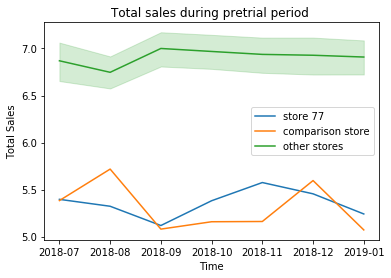

In [42]:
preTrialMeasures_store77 = preTrialMeasures[ preTrialMeasures.STORE_NBR == 77]
preTrialMeasures_store233 = preTrialMeasures[ preTrialMeasures.STORE_NBR == 233]
preTrialMeasures_other = preTrialMeasures[ preTrialMeasures.STORE_NBR != 77]

ax = plt.subplot()
sns.lineplot(x = 'month_year', y = 'SALES_PC' , data = preTrialMeasures_store77, ax = ax)
sns.lineplot(x = 'month_year', y = 'SALES_PC' , data = preTrialMeasures_store233, ax = ax)
sns.lineplot(x = 'month_year', y = 'SALES_PC' , data = preTrialMeasures_other, estimator= np.mean,ax = ax)
ax.set_title('Total sales during pretrial period ')
ax.set_xlabel('Time')
ax.set_ylabel('Total Sales')
ax.legend(['store 77', 'comparison store', 'other stores'])

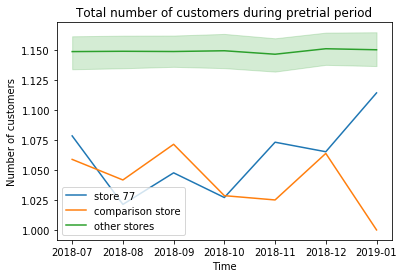

In [43]:
preTrialMeasures_store77 = preTrialMeasures[ preTrialMeasures.STORE_NBR == 77]
preTrialMeasures_store233 = preTrialMeasures[ preTrialMeasures.STORE_NBR == 233]
preTrialMeasures_other = preTrialMeasures[ preTrialMeasures.STORE_NBR != 77]

ax = plt.subplot()
sns.lineplot(x = 'month_year', y = 'TxnPCust' , data = preTrialMeasures_store77, ax = ax)
sns.lineplot(x = 'month_year', y = 'TxnPCust' , data = preTrialMeasures_store233, ax = ax)
sns.lineplot(x = 'month_year', y = 'TxnPCust' , data = preTrialMeasures_other, estimator= np.mean, ax = ax)
ax.set_title('Total number of customers during pretrial period')
ax.set_xlabel('Time')
ax.set_ylabel('Number of customers')
ax.legend(['store 77', 'comparison store', 'other stores'])

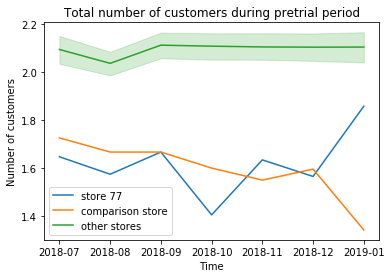

In [44]:
preTrialMeasures_store77 = preTrialMeasures[ preTrialMeasures.STORE_NBR == 77]
preTrialMeasures_store233 = preTrialMeasures[ preTrialMeasures.STORE_NBR == 233]
preTrialMeasures_other = preTrialMeasures[ preTrialMeasures.STORE_NBR != 77]

ax = plt.subplot()
sns.lineplot(x = 'month_year', y = 'ChsPTxn' , data = preTrialMeasures_store77, ax = ax)
sns.lineplot(x = 'month_year', y = 'ChsPTxn' , data = preTrialMeasures_store233, ax = ax)
sns.lineplot(x = 'month_year', y = 'ChsPTxn' , data = preTrialMeasures_other, estimator= np.mean, ax = ax)
ax.set_title('Total number of customers during pretrial period')
ax.set_xlabel('Time')
ax.set_ylabel('Number of customers')
ax.legend(['store 77', 'comparison store', 'other stores'])

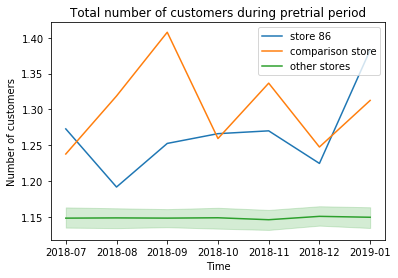

In [45]:
preTrialMeasures_store86 = preTrialMeasures[ preTrialMeasures.STORE_NBR == 86]
preTrialMeasures_store155 = preTrialMeasures[ preTrialMeasures.STORE_NBR == 155]
preTrialMeasures_other = preTrialMeasures[ preTrialMeasures.STORE_NBR != 86]

ax = plt.subplot()
sns.lineplot(x = 'month_year', y = 'TxnPCust' , data = preTrialMeasures_store86, ax = ax)
sns.lineplot(x = 'month_year', y = 'TxnPCust' , data = preTrialMeasures_store155, ax = ax)
sns.lineplot(x = 'month_year', y = 'TxnPCust' , data = preTrialMeasures_other, estimator= np.mean, ax = ax)
ax.set_title('Total number of customers during pretrial period')
ax.set_xlabel('Time')
ax.set_ylabel('Number of customers')
ax.legend(['store 86', 'comparison store', 'other stores'])

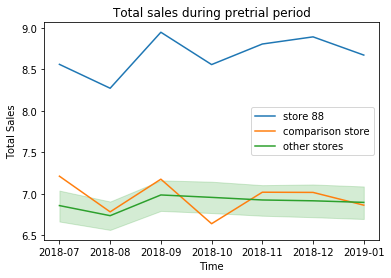

In [46]:
preTrialMeasures_store88 = preTrialMeasures[ preTrialMeasures.STORE_NBR == 88]
preTrialMeasures_store178 = preTrialMeasures[ preTrialMeasures.STORE_NBR == 178]
preTrialMeasures_other = preTrialMeasures[ preTrialMeasures.STORE_NBR != 88]

ax = plt.subplot()
sns.lineplot(x = 'month_year', y = 'SALES_PC' , data = preTrialMeasures_store88, ax = ax)
sns.lineplot(x = 'month_year', y = 'SALES_PC' , data = preTrialMeasures_store178, ax = ax)
sns.lineplot(x = 'month_year', y = 'SALES_PC' , data = preTrialMeasures_other, estimator= np.mean, ax = ax)
ax.set_title('Total sales during pretrial period')
ax.set_xlabel('Time')
ax.set_ylabel('Total Sales')
ax.legend(['store 88', 'comparison store', 'other stores'])

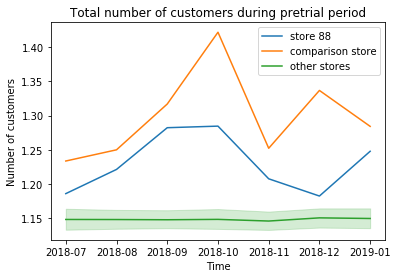

In [47]:
preTrialMeasures_store88 = preTrialMeasures[ preTrialMeasures.STORE_NBR == 88]
preTrialMeasures_store178 = preTrialMeasures[ preTrialMeasures.STORE_NBR == 178]
preTrialMeasures_other = preTrialMeasures[ preTrialMeasures.STORE_NBR != 88]

ax = plt.subplot()
sns.lineplot(x = 'month_year', y = 'TxnPCust' , data = preTrialMeasures_store88, ax = ax)
sns.lineplot(x = 'month_year', y = 'TxnPCust' , data = preTrialMeasures_store178, ax = ax)
sns.lineplot(x = 'month_year', y = 'TxnPCust' , data = preTrialMeasures_other, estimator= np.mean, ax = ax)
ax.set_title('Total number of customers during pretrial period')
ax.set_xlabel('Time')
ax.set_ylabel('Number of customers')
ax.legend(['store 88', 'comparison store', 'other stores'])

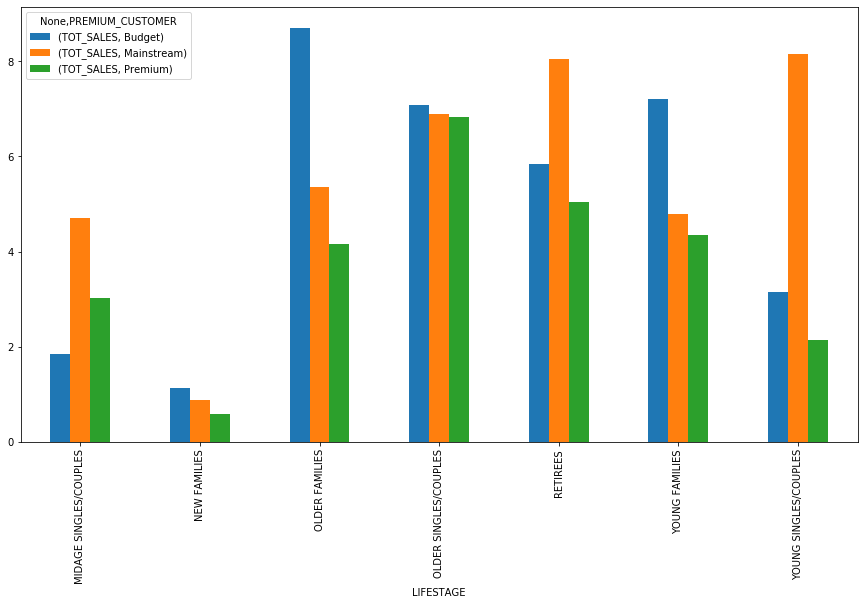

In [71]:
# after taking reference from model answer
# from the above figure, we cannot answer how premium our target customers are.

total = df.TOT_SALES.sum()
pvt   = pd.pivot_table(df, index = ['LIFESTAGE'],columns = ['PREMIUM_CUSTOMER'], values=['TOT_SALES'],aggfunc='sum')
pvt   = pvt.applymap(lambda x: round(x*100/total,2))
pvt.plot(kind = 'bar', figsize = (15,8), stacked = False, )

In [72]:
# average number of chips units bought in a transaction

# aucpc = masterdf[['TXN_ID','PROD_QTY']].groupby(['TXN_ID']).sum()
lyl = pd.pivot_table(df, index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values=['LYLTY_CARD_NBR'], aggfunc=[pd.Series.nunique])
aucpc = pd.pivot_table(df, index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values=['PROD_QTY'], aggfunc='sum')
# aucpc=aucpc.applymap(lambda x:round(x,3))
aucpc

PROD_QTY                   
PREMIUM_CUSTOMER         Budget Mainstream Premium
LIFESTAGE                                         
MIDAGE SINGLES/COUPLES     9496      22699   15526
NEW FAMILIES               5571       4319    2957
OLDER FAMILIES            45065      27756   21771
OLDER SINGLES/COUPLES     35220      34997   33986
RETIREES                  28764      40518   24884
YOUNG FAMILIES            37111      25044   22406
YOUNG SINGLES/COUPLES     16671      38632   11331

In [49]:
total = df.TXN_ID.count()
total

264834

In [50]:
#Removing the duplicates

data = df[pd.notnull(df['TXN_ID'])]
data

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,month_year,UPRICE
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018-10,3.0
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018-09,2.7
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019-03,3.6
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019-03,3.0
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018-11,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream,2018-12,3.6
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium,2018-10,4.6
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget,2018-10,4.2
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget,2018-10,5.1


In [51]:
filtered_data = data[['LIFESTAGE','TXN_ID']].drop_duplicates()

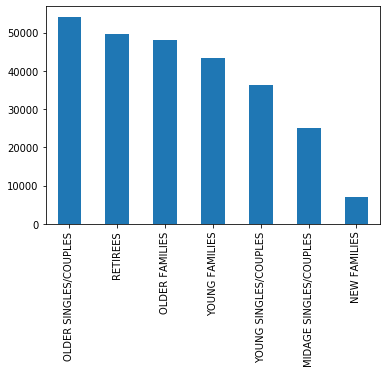

In [52]:
# Checking the Distribution of LIFESTAGE

filtered_data.LIFESTAGE.value_counts()[:10].plot(kind='bar')

In [53]:
# We can see here "OLDER SINGLE/COUPLES have the highest number of Purchases"

In [54]:
# Lets find the total sales for each transaction and we will working on customer ID, Sales, 
# Purhase date column only

# Creating a Unit_Price column

df["UNIT_PRICE"] = df['TOT_SALES'] / df['PROD_QTY']

# Create a new DF with only customer ID, Total sales, and Purhase date

tx_final = df[['TXN_ID','DATE', 'TOT_SALES']]

tx_final.head()

,TXN_ID,DATE,TOT_SALES
0,1,2018-10-17,6.0
1,2,2018-09-16,2.7
2,3,2019-03-07,3.6
3,4,2019-03-08,3.0
4,5,2018-11-02,1.9


In [55]:
# Find the last order date which will be used as a reference.

last_order_date = df['DATE'].max()

print(last_order_date)

2019-06-30


In [56]:
# Converting the transaction data to summary data

from lifetimes.utils import summary_data_from_transaction_data

summary_tx_data = summary_data_from_transaction_data(tx_final, 'TXN_ID', 'DATE',
                                                    monetary_value_col = 'TOT_SALES',
                                                    observation_period_end = '2019-06-30')

summary_tx_data.head()

,frequency,recency,T,monetary_value
TXN_ID,,,,
1,0.0,0.0,256.0,0.0
2,0.0,0.0,287.0,0.0
3,0.0,0.0,115.0,0.0
4,0.0,0.0,114.0,0.0
5,0.0,0.0,240.0,0.0


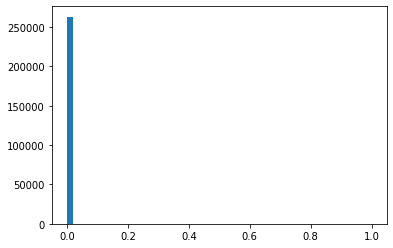

In [57]:
# Distribution of frequency

plt.hist(summary_tx_data['frequency'], bins = 50)

plt.show()

# I can see majority of of the purchases are once only.

In [58]:
# What percentage of customers purchased only once

one_time_buyer = (sum(summary_tx_data['frequency']==0)/len(summary_tx_data))*100

one_time_buyer

99.99847980997625

In [59]:
# Import library

from lifetimes import BetaGeoFitter

# Create BG/NBD model

BGF = BetaGeoFitter()

# Fit the model on you summary data excluding monetary_value

BGF.fit(summary_tx_data['frequency'], summary_tx_data['recency'], summary_tx_data['T'])

<lifetimes.BetaGeoFitter: fitted with 263125 subjects, a: 1.11, alpha: 50019.09, b: 1.11, r: 0.00>

In [60]:
# Prediction of purchase for next 10 days

summary_tx_data['Pred_tx_num'] = BGF.conditional_expected_number_of_purchases_up_to_time(10,
                                                                                        summary_tx_data['frequency'],
                                                                                        summary_tx_data['recency'],
                                                                                        summary_tx_data['T'])

# Arrange the data based on Pred_tx_num

summary_tx_data.sort_values(by = 'Pred_tx_num', ascending = False)

,frequency,recency,T,monetary_value,Pred_tx_num
TXN_ID,,,,,
156002,1.0,14.0,141.0,11.8,9.995924e-05
155469,1.0,187.0,212.0,8.8,9.992020e-05
50042,1.0,1.0,196.0,3.8,9.978170e-05
155468,1.0,95.0,321.0,6.0,9.950347e-05
228592,0.0,0.0,0.0,0.0,8.378125e-07
...,...,...,...,...,...
60828,0.0,0.0,364.0,0.0,8.317599e-07
244867,0.0,0.0,364.0,0.0,8.317599e-07
229122,0.0,0.0,364.0,0.0,8.317599e-07


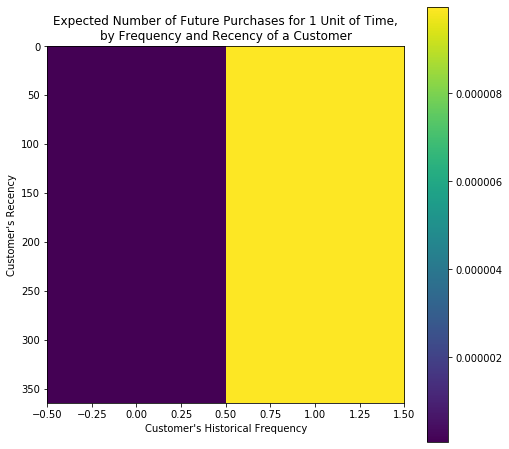

In [61]:
# Lets visualize our model and try to interpret 

from matplotlib import pyplot as plt
from lifetimes.plotting import plot_frequency_recency_matrix

# I can increase the ploting area

plt.figure(figsize=(8,8))

plot_frequency_recency_matrix(BGF)

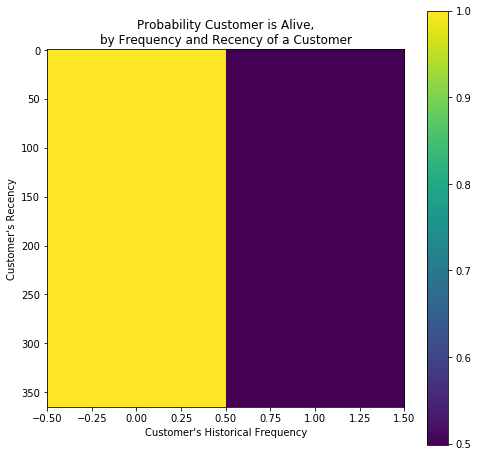

In [62]:
# lets try to visualize if a customer is still active or not

from lifetimes.plotting import plot_probability_alive_matrix

# I can increase the ploting area

plt.figure(figsize=(8,8))

plot_probability_alive_matrix(BGF)


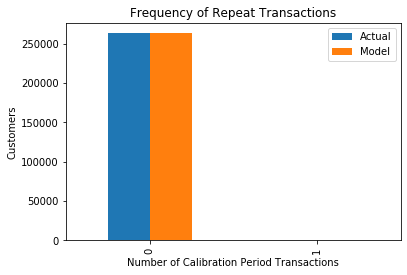

In [63]:
# Lets find if my model is correct or not

from lifetimes.plotting import plot_period_transactions

plot_period_transactions(BGF)

In [64]:
# Lets find the correlation between monetary_value and frequency

summary_tx_data[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,0.930015
frequency,0.930015,1.000000


In [65]:
# lets find the number of customers who had at least one repeat purchase with the company

shortlisted_cust = summary_tx_data[summary_tx_data['frequency']>0]

len(shortlisted_cust)

4

In [66]:
# We have already calculated the RFM values for each customer

summary_tx_data

# From this data we do not need T, Pred_tx_num, CLV column

RFM_table = summary_tx_data[['frequency', 'recency', 'monetary_value']]

RFM_table.head()

,frequency,recency,monetary_value
TXN_ID,,,
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0


In [67]:
# Lets divide the data into 4 segments 

quantiles = RFM_table.quantile(q=[0.25, 0.5,0.75])

quantiles

# convert this quantiles into dict

quantiles_dic = quantiles.to_dict()

quantiles_dic

{'frequency': {0.25: 0.0, 0.5: 0.0, 0.75: 0.0},
 'recency': {0.25: 0.0, 0.5: 0.0, 0.75: 0.0},
 'monetary_value': {0.25: 0.0, 0.5: 0.0, 0.75: 0.0}}

In [68]:
# Create a UDF to find the R score, F and M score

def score(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else: 
        return 4    

In [69]:
# Create three segments of R,F,M

RFM_table['R'] = RFM_table['recency'].apply(score, args = ('recency', quantiles_dic))

RFM_table['F'] = RFM_table['frequency'].apply(score, args = ('frequency', quantiles_dic))

RFM_table['M'] = RFM_table['monetary_value'].apply(score, args = ('monetary_value', quantiles_dic))

In [70]:
# Create a RFM group for each customer

RFM_table['RFMGroup'] = RFM_table.R.map(str) + RFM_table.F.map(str) + RFM_table.M.map(str)

# Calcuate and add score values column showing total sum of RFMGroup values

RFM_table['RFMScore'] = RFM_table[['R', 'F', 'M']].sum(axis = 1)

RFM_table.head()

,frequency,recency,monetary_value,R,F,M,RFMGroup,RFMScore
TXN_ID,,,,,,,,
1,0.0,0.0,0.0,1,1,1,111,3
2,0.0,0.0,0.0,1,1,1,111,3
3,0.0,0.0,0.0,1,1,1,111,3
4,0.0,0.0,0.0,1,1,1,111,3
5,0.0,0.0,0.0,1,1,1,111,3


The RFM score suggest how good a customer is for us. Higher the score, better is the customer

In [ ]:
#Conclusion

#